# K-Nearest Neighbors

K-Nearest Neighbor or KNN is a machine learning technique that can be used for both regression and classification tasks. KNN examines the labels of chosen number of data points sorrounding the target data point. The greater the distance between the points, the less similar they are. Below KNN is demonstrated by using the iris data set

|![KNN](img/img1.png) |
|:--:| 
|*Example of K-Nearest Neighbor*|

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = datasets.load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
#Seperating the training data and the test data

train = data['data']
labels = data['target']

setosa = data['data'][:50]
virginica = data['data'][50:100]
versicolor = data['data'][100:150]

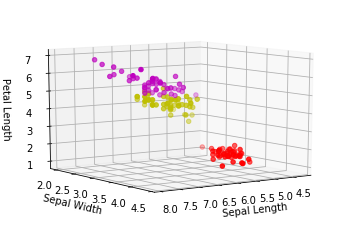

In [4]:
#Displaying Sepal Length/Width and Petal Lenght in 3D plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.scatter(setosa[:,0], setosa[:,1], setosa[:,2],color = 'r', marker='o')
ax.scatter(virginica[:,0], virginica[:,1], virginica[:,2],color = 'y', marker='o')
ax.scatter(versicolor[:,0], versicolor[:,1], versicolor[:,2],color = 'm', marker='o')
ax.view_init(10, 55)
plt.show()

In [5]:
#Seperating our data

train_df = pd.DataFrame(train, columns = ['sepal length', 'sepal width', 'petal length', 'petal width'])
label_df = pd.DataFrame(labels, columns = ['species'])

newTrain = pd.concat([train_df, label_df], axis = 1)
newLabel = newTrain['species']

In [6]:
#Scaling our data

scaler = StandardScaler()
scaler.fit(newTrain.drop('species',axis=1))
scaled_features = scaler.transform(newTrain.drop('species',axis=1))


In [7]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,newTrain['species'],
                                                    test_size=0.30)

In [8]:
numTest = X_test.shape[0]

In [9]:
#Using K Nearest Classifier to test our data

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [10]:
# Testing our prediction using confusion matrix and displaying classification report

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[14  0  0]
 [ 0 14  3]
 [ 0  0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.82      0.90        17
           2       0.82      1.00      0.90        14

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.95      0.93      0.93        45



In [11]:
#Testing our error rate

error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

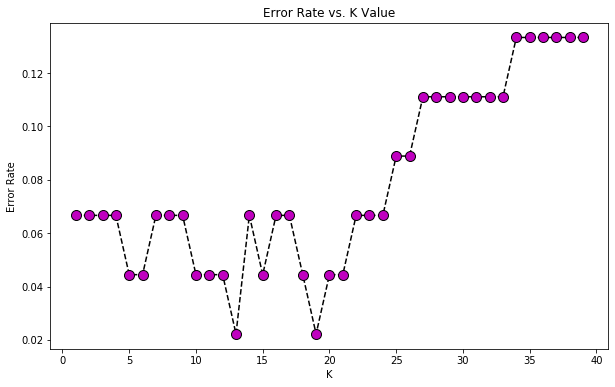

In [12]:
#Plotting our error rate vs k value

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='black', linestyle='dashed', marker='o',
         markerfacecolor='m', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [13]:
#Predicting a diffrent value after diplaying the plot: n_neighbors = 18

knn = KNeighborsClassifier(n_neighbors=18)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[14  0  0]
 [ 0 17  0]
 [ 0  2 12]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.89      1.00      0.94        17
           2       1.00      0.86      0.92        14

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.96        45
weighted avg       0.96      0.96      0.96        45



### References

#### 1. https://scikit-learn.org/stable/modules/neighbors.html
#### 2. https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/tutorial/plot_knn_iris.html
#### 3. https://github.com/upura/knnFeat/blob/master/demo.ipynb
#### 4. https://github.com/amydaali/Machine-Learning-Projects/blob/master/KNN/K%20Nearest%20Neighbors%20Project.ipynb